In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")

In [3]:
data = np.array(df.values, dtype=float)

In [4]:
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [6]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):        
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)
    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [7]:
k = 4

In [8]:
### D. K-Means Clustering
# The following k values were tested:
#      k=3: There was not much variation in the values between clusters.
#      k=4: Very few null values, and some nice variation in non-null values.
#      k=5: Some null values, and some nice variation in non-null values.
#      k=6: Seems to have some nice variaty, but a lot more values than in k=5.

# Thus, assuming we want to avoid null values, k=4 appears to be the best value of k to choose.

In [9]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [10]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [11]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


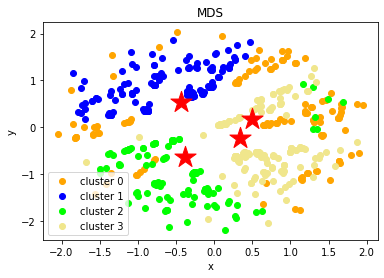

In [12]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [13]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


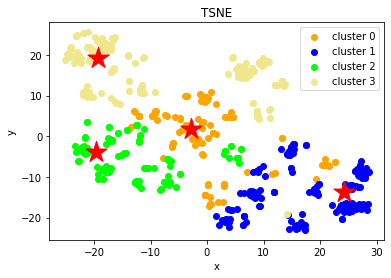

In [14]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [15]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [16]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,2
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,0
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,3
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,3
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,2


In [17]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,2
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,3
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,3
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,3
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,0


In [18]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.282667,0.941232,1.118179,0.712600,0.432000,0.824000,0.032000,0.736000,0.000000,0.136000,0.024000,0.280000,0.432,0.152000,0.000000,0.881192
1,0.236499,0.911167,1.064059,0.724441,0.977654,0.743017,0.022346,0.675978,0.011173,0.139665,0.044693,0.195531,1.000,0.000000,1.000000,0.851162
2,0.074667,0.869486,0.986296,0.735000,0.904000,0.624000,0.008000,0.000000,0.008000,0.112000,0.072000,0.208000,0.000,0.560000,0.632000,0.773763
3,0.353153,0.937008,1.120404,0.688514,0.989189,0.945946,0.021622,1.000000,0.000000,0.140541,0.064865,0.205405,0.000,0.610811,0.886486,0.921415


Task 2

Cluster 3 has the highest LoanAmount, while Cluster 2 has the lowest.
In comparison to the other Clusters, Cluster 2 has a significantly smaller number of dependents.
Cluster 1's Credit History is slightly smaller than what is seen in the other Clusters.
Cluster 2 seems to have a significantly lower male participation rate than the other Clusters. The male-to-female ratio is more in line with the other Clusters.
The percentage of married participants ranges significantly among the participants, with a 20 percent disparity between Clusters.
Cluster 2 has a greater proportion of members who are not college graduates than the other Clusters.
The Property Area Urban column has two null values, which may mean that there are no urban inhabitants in Clusters 2 and 3. Cluster 0 members all tend to live in villages.

Task 3

In [20]:
import numpy as np  
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_files
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
sse = {}
for k in range(1, 4):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_

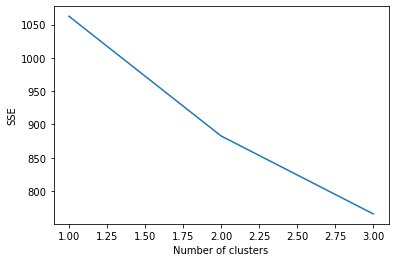

In [22]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Task 4

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [24]:
X = data
y = data

In [25]:
k_mean_values = {}

In [26]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    k_mean_values[n_cluster] = sil_coeff

For n_clusters=2, The Silhouette Coefficient is 0.18654028464861305
For n_clusters=3, The Silhouette Coefficient is 0.18824581502632493
For n_clusters=4, The Silhouette Coefficient is 0.1875700774802174
For n_clusters=5, The Silhouette Coefficient is 0.19069503647073568
For n_clusters=6, The Silhouette Coefficient is 0.20781243054510865
For n_clusters=7, The Silhouette Coefficient is 0.21396402742930276
For n_clusters=8, The Silhouette Coefficient is 0.22928348056413067
For n_clusters=9, The Silhouette Coefficient is 0.22989026702115423
For n_clusters=10, The Silhouette Coefficient is 0.22135944569618005


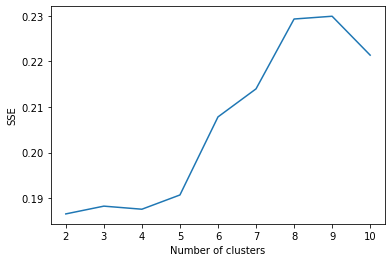

In [27]:
plt.figure()
plt.plot(list(k_mean_values.keys()), list(k_mean_values.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 

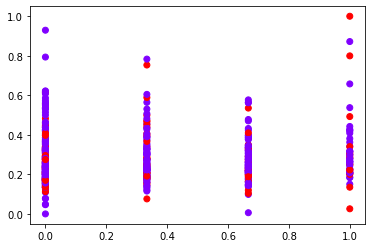

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
print(cluster.labels_)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')


In [30]:
print(__doc__)
from time import time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

Automatically created module for IPython interactive environment


In [31]:
X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape

In [32]:
np.random.seed(0)

In [33]:
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=2, n_neighbors=15)
X_se = se.fit_transform(data)

In [34]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)
    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	0.01s
average :	0.01s
complete :	0.01s
single :	0.00s


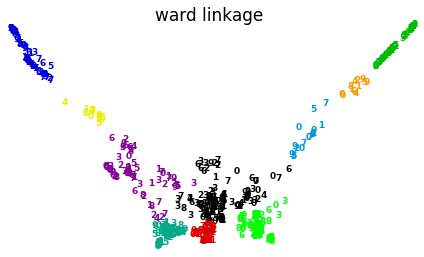

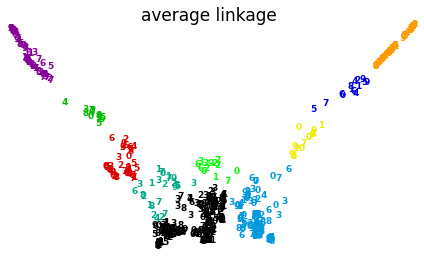

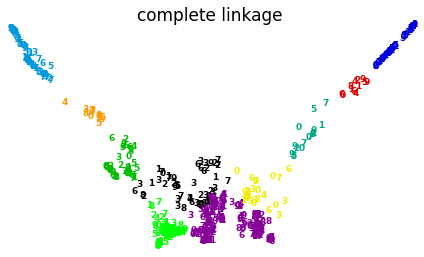

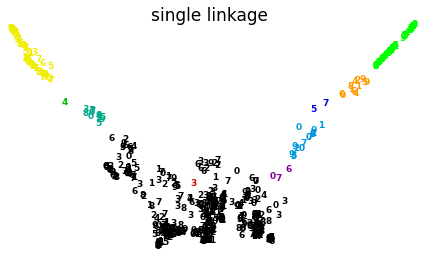

In [35]:
print("Computing embedding")
X_red = X_se
print("Done.")
from sklearn.cluster import AgglomerativeClustering
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

In [36]:
plt.show()